In [46]:
from typing import List, Optional
from autograd import grad, jacobian, elementwise_grad
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from tqdm import tqdm
import math
import scipy 
from scipy import linalg
from numpy import linalg as LA
from pyblas.level1 import dnrm2

sys.path.insert(0, os.path.join(".."))
%reload_ext autoreload
%autoreload 2

In [47]:
from lib import problems as pr
from lib import optimisers as opt
from lib import utils as ut

**Evaluation**

100%|███████████████████████████████████| 100/100 [00:00<00:00, 4314.73it/s]


101 101


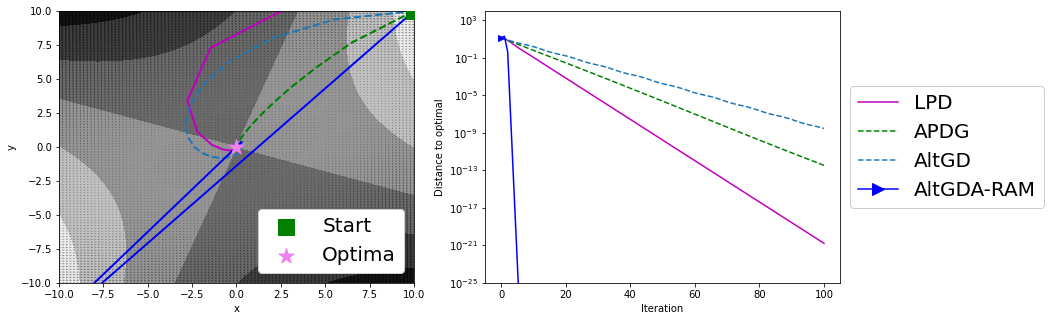

In [14]:
figname = 'APDG__opt.png'
FIG_DIR = os.path.join("..", "figures")
if not os.path.exists(FIG_DIR):
    os.mkdir(FIG_DIR)
    
k = 5
markevery= 10
x0, y0 = np.array([10.]),np.array([10.])
A = np.eye(1, 1) * 2.5

problem = pr.func2(A=A)
xopt, yopt = problem.xopt, problem.yopt
params = {"apdg": None,
          'altgd': 0.1,
          'AA': 0.5
         }
xmin, xmax, xstep = (-10, 10, .2)
ymin, ymax, ystep = (-10, 10, .2)
 # {'simgd':0.05, 'altgd':0.1, 'avg':1, 'adam':0.01, 'eg':0.6,'omd':0.3, 'fr':0.05,'AA':0.5}
f = problem.f
g = problem.g

type2=True
iteration = 100
loss_f3, xpath_f3, ypath_f3 = ut.main(problem, iteration, x0.copy(), y0.copy(), params, k=k, one_dim=True)

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
zf = lambda x, y: f(x) - g(y) + x * A * y
z = zf(x, y)
dz_dx = elementwise_grad(zf, argnum=0)(x, y)
dz_dy = elementwise_grad(zf, argnum=1)(x, y)
ut.plot(x, y, z, dz_dx, dz_dy, 
        loss_f3, xpath_f3, ypath_f3, iteration, k, 
        start=(x0, y0), solution=(xopt, yopt), 
        ranges={"x": (-10, 10, .2),
                "y": (-10, 10, .2)
               }, figname=figname,
        fig_dir=FIG_DIR, markevery=10)

## Ndim

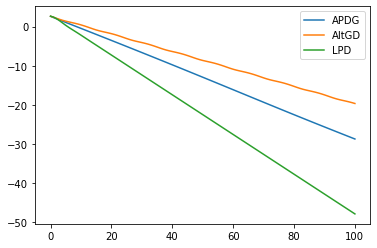

In [15]:
%matplotlib inline
import numpy as np
plt.plot(np.log(loss_f3[0]), label="APDG")
plt.plot(np.log(loss_f3[1]), label="AltGD")
plt.plot(np.log(loss_f3[7]), label="LPD")
plt.legend()

(3, 3)
(3, 0)
(3, 3)
3 3
99.9999999999998 25.000000000000025
L_xy = 9.99999999999999, L_yx = 9.99999999999999
[2.         1.45710678 1.        ]


100%|██████████████████████████████████| 100/100 [00:00<00:00, 14246.96it/s]

101 101


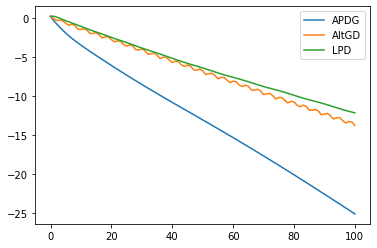

In [45]:
import scipy.linalg as sla

nx=3
ny=3

problem_n = pr.BilinearQuadraticSaddle.with_parameters(nx=nx, ny=ny, L_x=2, mu_x=1, L_y=2, mu_y=1, L_xy=10, mu_xy=5)
print(sla.svdvals(problem_n.C))
params = {'apdg': None,
          'altgd': 0.1,
          'AA': 0.5
         }
 # {'simgd':0.05, 'altgd':0.1, 'avg':1, 'adam':0.01, 'eg':0.6,'omd':0.3, 'fr':0.05,'AA':0.5}

x0 = np.random.randn(nx, )
y0 = np.random.randn(ny, )
type2=True
iteration = 100
k =  10
loss_f3, xpath_f3, ypath_f3 = ut.main(problem_n, iteration, x0.copy(), y0.copy(), params, k=k)

%matplotlib inline
import numpy as np
plt.plot(np.log(loss_f3[0]), label="APDG")
plt.plot(np.log(loss_f3[1]), label="AltGD")
plt.plot(np.log(loss_f3[7]), label="LPD")
plt.legend()